# DATA PRE-PROCESSING

### Importing Libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = 13,9
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### Retrieve DataSet 

In [2]:
data = pd.read_excel('INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls')

In [3]:
data.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3


### Basic Info

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
EmpNumber                       1200 non-null object
Age                             1200 non-null int64
Gender                          1200 non-null object
EducationBackground             1200 non-null object
MaritalStatus                   1200 non-null object
EmpDepartment                   1200 non-null object
EmpJobRole                      1200 non-null object
BusinessTravelFrequency         1200 non-null object
DistanceFromHome                1200 non-null int64
EmpEducationLevel               1200 non-null int64
EmpEnvironmentSatisfaction      1200 non-null int64
EmpHourlyRate                   1200 non-null int64
EmpJobInvolvement               1200 non-null int64
EmpJobLevel                     1200 non-null int64
EmpJobSatisfaction              1200 non-null int64
NumCompaniesWorked              1200 non-null int64
OverTime                        1200 non-null object
E

In [5]:
data.shape

(1200, 28)

### Check whether null value are present or not?

In [6]:
data.isnull().sum()

EmpNumber                       0
Age                             0
Gender                          0
EducationBackground             0
MaritalStatus                   0
EmpDepartment                   0
EmpJobRole                      0
BusinessTravelFrequency         0
DistanceFromHome                0
EmpEducationLevel               0
EmpEnvironmentSatisfaction      0
EmpHourlyRate                   0
EmpJobInvolvement               0
EmpJobLevel                     0
EmpJobSatisfaction              0
NumCompaniesWorked              0
OverTime                        0
EmpLastSalaryHikePercent        0
EmpRelationshipSatisfaction     0
TotalWorkExperienceInYears      0
TrainingTimesLastYear           0
EmpWorkLifeBalance              0
ExperienceYearsAtThisCompany    0
ExperienceYearsInCurrentRole    0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
Attrition                       0
PerformanceRating               0
dtype: int64

In [7]:
data.columns

Index(['EmpNumber', 'Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'PerformanceRating'],
      dtype='object')

### Drop irrelevant column - Employee Number

In [8]:
data.drop(['EmpNumber'],axis=1,inplace=True)

### Type conversion of data from String to Float by using In-Built function

In [9]:
data = pd.get_dummies(data, drop_first=True)

In [10]:
data.head()

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,...,EmpJobRole_Sales Executive,EmpJobRole_Sales Representative,EmpJobRole_Senior Developer,EmpJobRole_Senior Manager R&D,EmpJobRole_Technical Architect,EmpJobRole_Technical Lead,BusinessTravelFrequency_Travel_Frequently,BusinessTravelFrequency_Travel_Rarely,OverTime_Yes,Attrition_Yes
0,32,10,3,4,55,3,2,4,1,12,...,1,0,0,0,0,0,0,1,0,0
1,47,14,4,4,42,3,2,1,2,12,...,1,0,0,0,0,0,0,1,0,0
2,40,5,4,4,48,2,3,1,5,21,...,1,0,0,0,0,0,1,0,1,0
3,41,10,4,2,73,2,5,4,3,15,...,0,0,0,0,0,0,0,1,0,0
4,60,16,4,1,84,3,2,1,8,14,...,1,0,0,0,0,0,0,1,0,0


In [11]:
data.to_csv('INX_Future_Inc.csv',index=False)

# Data Exploratory

### Retrieve DataSet

In [11]:
data = pd.read_excel('INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls')
data.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3


In [12]:
data.groupby('PerformanceRating').count()


,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
PerformanceRating,,,,,,,,,,,,,,,,,,,,,
2,194,194,194,194,194,194,194,194,194,194,...,194,194,194,194,194,194,194,194,194,194
3,874,874,874,874,874,874,874,874,874,874,...,874,874,874,874,874,874,874,874,874,874
4,132,132,132,132,132,132,132,132,132,132,...,132,132,132,132,132,132,132,132,132,132


## Department-wise Performance Rating
### -------------------------------------------------------------

In [13]:
data.groupby('EmpDepartment').count()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
EmpDepartment,,,,,,,,,,,,,,,,,,,,,
Data Science,20,20,20,20,20,20,20,20,20,20,...,20,20,20,20,20,20,20,20,20,20
Development,361,361,361,361,361,361,361,361,361,361,...,361,361,361,361,361,361,361,361,361,361
Finance,49,49,49,49,49,49,49,49,49,49,...,49,49,49,49,49,49,49,49,49,49
Human Resources,54,54,54,54,54,54,54,54,54,54,...,54,54,54,54,54,54,54,54,54,54
Research & Development,343,343,343,343,343,343,343,343,343,343,...,343,343,343,343,343,343,343,343,343,343
Sales,373,373,373,373,373,373,373,373,373,373,...,373,373,373,373,373,373,373,373,373,373


In [14]:
Data_science = data[data['EmpDepartment'] == 'Data Science']
Data_science.groupby('PerformanceRating').count()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
PerformanceRating,,,,,,,,,,,,,,,,,,,,,
2,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3,17,17,17,17,17,17,17,17,17,17,...,17,17,17,17,17,17,17,17,17,17
4,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2


#### Good = 5%, Excellent = 85%, Outstanding = 10%

In [15]:
Development = data[data['EmpDepartment'] == 'Development']
Development.groupby('PerformanceRating').count()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
PerformanceRating,,,,,,,,,,,,,,,,,,,,,
2,13,13,13,13,13,13,13,13,13,13,...,13,13,13,13,13,13,13,13,13,13
3,304,304,304,304,304,304,304,304,304,304,...,304,304,304,304,304,304,304,304,304,304
4,44,44,44,44,44,44,44,44,44,44,...,44,44,44,44,44,44,44,44,44,44


#### Good = 3.6%, Excellent = 84.21%, Outstanding = 12.18%

In [16]:
Finance = data[data['EmpDepartment'] == 'Finance']
Finance.groupby('PerformanceRating').count()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
PerformanceRating,,,,,,,,,,,,,,,,,,,,,
2,15,15,15,15,15,15,15,15,15,15,...,15,15,15,15,15,15,15,15,15,15
3,30,30,30,30,30,30,30,30,30,30,...,30,30,30,30,30,30,30,30,30,30
4,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4


#### Good = 30.6%, Excellent = 61.2%, Outstanding = 8.2%

In [17]:
Human_Resources = data[data['EmpDepartment'] == 'Human Resources']
Human_Resources.groupby('PerformanceRating').count()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
PerformanceRating,,,,,,,,,,,,,,,,,,,,,
2,10,10,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10
3,38,38,38,38,38,38,38,38,38,38,...,38,38,38,38,38,38,38,38,38,38
4,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6


#### Good = 18.5%, Excellent = 70.4%, Outstanding = 11.1%

In [18]:
R_D = data[data['EmpDepartment'] == 'Research & Development']
R_D.groupby('PerformanceRating').count()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
PerformanceRating,,,,,,,,,,,,,,,,,,,,,
2,68,68,68,68,68,68,68,68,68,68,...,68,68,68,68,68,68,68,68,68,68
3,234,234,234,234,234,234,234,234,234,234,...,234,234,234,234,234,234,234,234,234,234
4,41,41,41,41,41,41,41,41,41,41,...,41,41,41,41,41,41,41,41,41,41


#### Good = 19.8%, Excellent = 68.2%, Outstanding = 12%

In [19]:
Sales = data[data['EmpDepartment'] == 'Sales']
Sales.groupby('PerformanceRating').count()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
PerformanceRating,,,,,,,,,,,,,,,,,,,,,
2,87,87,87,87,87,87,87,87,87,87,...,87,87,87,87,87,87,87,87,87,87
3,251,251,251,251,251,251,251,251,251,251,...,251,251,251,251,251,251,251,251,251,251
4,35,35,35,35,35,35,35,35,35,35,...,35,35,35,35,35,35,35,35,35,35


#### Good = 23.3%, Excellent = 67.3%, Outstanding = 9.4%

##### ------------------------------------------------------------------------------
##### LOW PERFORMANCE  =>  Development < Data_Science < HR < R & D < Sales < Finance
##### ------------------------------------------------------------------------------

In [20]:
Correlation = data.corr()

## TOP 3 FACTORS EFFECTING EMPLOYEE PERFORMANCE

In [21]:
Correlation[Correlation.PerformanceRating>0.1] 

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
EmpEnvironmentSatisfaction,0.013814,-0.017719,-0.037103,1.000000,-0.049501,0.004865,-0.008272,-0.004319,0.017270,-0.047271,-0.010504,-0.012894,0.001192,-0.000262,-0.000561,0.025491,0.010732,-0.011702,0.395561
EmpLastSalaryHikePercent,-0.006105,0.044974,0.002358,-0.047271,-0.015934,-0.001742,-0.020975,0.031847,-0.011788,1.000000,-0.042892,-0.005933,-0.013439,-0.017001,-0.019830,-0.004957,-0.015911,-0.007666,0.333722
EmpWorkLifeBalance,-0.019563,-0.044788,0.010276,-0.000262,0.016189,-0.014129,0.049218,-0.018548,0.002489,-0.017001,-0.004906,0.015495,0.037048,1.000000,0.023479,0.045719,0.015773,0.010518,0.124429
PerformanceRating,-0.040164,-0.046142,0.020529,0.395561,-0.043116,-0.010539,-0.076632,0.000606,0.020980,0.333722,-0.019502,-0.068141,-0.005443,0.124429,-0.111645,-0.147638,-0.167629,-0.122313,1.000000


#### ------------------------------------------------------
#### TOP 1 : EMPLOYEE ENVIRONMENT SATISFACTION
#### ------------------------------------------------------

In [22]:
data.groupby('EmpEnvironmentSatisfaction').count()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
EmpEnvironmentSatisfaction,,,,,,,,,,,,,,,,,,,,,
1,230,230,230,230,230,230,230,230,230,230,...,230,230,230,230,230,230,230,230,230,230
2,242,242,242,242,242,242,242,242,242,242,...,242,242,242,242,242,242,242,242,242,242
3,367,367,367,367,367,367,367,367,367,367,...,367,367,367,367,367,367,367,367,367,367
4,361,361,361,361,361,361,361,361,361,361,...,361,361,361,361,361,361,361,361,361,361


In [23]:
Low = data[data['EmpEnvironmentSatisfaction'] == 1]
Low.groupby('PerformanceRating').count()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
PerformanceRating,,,,,,,,,,,,,,,,,,,,,
2,90,90,90,90,90,90,90,90,90,90,...,90,90,90,90,90,90,90,90,90,90
3,127,127,127,127,127,127,127,127,127,127,...,127,127,127,127,127,127,127,127,127,127
4,13,13,13,13,13,13,13,13,13,13,...,13,13,13,13,13,13,13,13,13,13


#### Good = 39.1%, Excellent = 55.2%, Outstanding = 5.7% 

In [24]:
Medium = data[data['EmpEnvironmentSatisfaction'] == 2]
Medium.groupby('PerformanceRating').count()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
PerformanceRating,,,,,,,,,,,,,,,,,,,,,
2,98,98,98,98,98,98,98,98,98,98,...,98,98,98,98,98,98,98,98,98,98
3,130,130,130,130,130,130,130,130,130,130,...,130,130,130,130,130,130,130,130,130,130
4,14,14,14,14,14,14,14,14,14,14,...,14,14,14,14,14,14,14,14,14,14


#### Good = 40.5%, Excellent = 53.7%, Outstanding = 5.8% 

In [25]:
High = data[data['EmpEnvironmentSatisfaction'] == 3]
High.groupby('PerformanceRating').count()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
PerformanceRating,,,,,,,,,,,,,,,,,,,,,
2,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
3,310,310,310,310,310,310,310,310,310,310,...,310,310,310,310,310,310,310,310,310,310
4,54,54,54,54,54,54,54,54,54,54,...,54,54,54,54,54,54,54,54,54,54


#### Good = 0.8%, Excellent = 84.5%, Outstanding = 14.7%

In [26]:
Very_High = data[data['EmpEnvironmentSatisfaction'] == 4]
Very_High.groupby('PerformanceRating').count()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
PerformanceRating,,,,,,,,,,,,,,,,,,,,,
2,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
3,307,307,307,307,307,307,307,307,307,307,...,307,307,307,307,307,307,307,307,307,307
4,51,51,51,51,51,51,51,51,51,51,...,51,51,51,51,51,51,51,51,51,51


#### Good = 0.8%, Excellent = 85%, Outstanding = 14.1%

##### As we can see, Employee Environment Satisfaction is very important for its performance
##### Number of Employee with Good performance
##### ----------------------------------------------------------------
##### Very_High < High < Low < Medium
##### ----------------------------------------------------------------
##### Number of Employee with Outstanding performance
##### ----------------------------------------------------------------
##### Low < Medium < Very_High < High
##### ----------------------------------------------------------------

#### ------------------------------------------------------
#### TOP 2 : EMPLOYEE LAST SALARY HIKE PERCENT
#### ------------------------------------------------------

In [27]:
data.groupby('EmpLastSalaryHikePercent').count()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
EmpLastSalaryHikePercent,,,,,,,,,,,,,,,,,,,,,
11,169,169,169,169,169,169,169,169,169,169,...,169,169,169,169,169,169,169,169,169,169
12,155,155,155,155,155,155,155,155,155,155,...,155,155,155,155,155,155,155,155,155,155
13,168,168,168,168,168,168,168,168,168,168,...,168,168,168,168,168,168,168,168,168,168
14,172,172,172,172,172,172,172,172,172,172,...,172,172,172,172,172,172,172,172,172,172
15,82,82,82,82,82,82,82,82,82,82,...,82,82,82,82,82,82,82,82,82,82
16,68,68,68,68,68,68,68,68,68,68,...,68,68,68,68,68,68,68,68,68,68
17,67,67,67,67,67,67,67,67,67,67,...,67,67,67,67,67,67,67,67,67,67
18,73,73,73,73,73,73,73,73,73,73,...,73,73,73,73,73,73,73,73,73,73
19,63,63,63,63,63,63,63,63,63,63,...,63,63,63,63,63,63,63,63,63,63


In [28]:
P11 = data[data['EmpLastSalaryHikePercent'] == 11]
P11.groupby('PerformanceRating').count()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
PerformanceRating,,,,,,,,,,,,,,,,,,,,,
2,28,28,28,28,28,28,28,28,28,28,...,28,28,28,28,28,28,28,28,28,28
3,140,140,140,140,140,140,140,140,140,140,...,140,140,140,140,140,140,140,140,140,140
4,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


#### Good = 16.6%, Excellent = 82.8%, Outstanding = 0.6% 

In [29]:
P12 = data[data['EmpLastSalaryHikePercent'] == 12]
P12.groupby('PerformanceRating').count()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
PerformanceRating,,,,,,,,,,,,,,,,,,,,,
2,30,30,30,30,30,30,30,30,30,30,...,30,30,30,30,30,30,30,30,30,30
3,123,123,123,123,123,123,123,123,123,123,...,123,123,123,123,123,123,123,123,123,123
4,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2


#### Good = 19.4%, Excellent = 79.4%, Outstanding = 1.3%

In [30]:
P13 = data[data['EmpLastSalaryHikePercent'] == 13]
P13.groupby('PerformanceRating').count()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
PerformanceRating,,,,,,,,,,,,,,,,,,,,,
2,27,27,27,27,27,27,27,27,27,27,...,27,27,27,27,27,27,27,27,27,27
3,138,138,138,138,138,138,138,138,138,138,...,138,138,138,138,138,138,138,138,138,138
4,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3


#### Good = 16.1%, Excellent = 82.1%, Outstanding = 1.8% 

In [31]:
P14 = data[data['EmpLastSalaryHikePercent'] == 14]
P14.groupby('PerformanceRating').count()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
PerformanceRating,,,,,,,,,,,,,,,,,,,,,
2,28,28,28,28,28,28,28,28,28,28,...,28,28,28,28,28,28,28,28,28,28
3,140,140,140,140,140,140,140,140,140,140,...,140,140,140,140,140,140,140,140,140,140
4,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4


#### Good = 16.3%, Excellent = 81.4%, Outstanding = 2.3%

In [32]:
P15 = data[data['EmpLastSalaryHikePercent'] == 15]
P15.groupby('PerformanceRating').count()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
PerformanceRating,,,,,,,,,,,,,,,,,,,,,
2,11,11,11,11,11,11,11,11,11,11,...,11,11,11,11,11,11,11,11,11,11
3,67,67,67,67,67,67,67,67,67,67,...,67,67,67,67,67,67,67,67,67,67
4,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4


#### Good = 13.4%, Excellent = 81.7%, Outstanding = 4.9%

In [33]:
P16 = data[data['EmpLastSalaryHikePercent'] == 16]
P16.groupby('PerformanceRating').count()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
PerformanceRating,,,,,,,,,,,,,,,,,,,,,
2,12,12,12,12,12,12,12,12,12,12,...,12,12,12,12,12,12,12,12,12,12
3,54,54,54,54,54,54,54,54,54,54,...,54,54,54,54,54,54,54,54,54,54
4,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2


#### Good = 17.6%, Excellent = 79.4%, Outstanding = 2.9% 

In [34]:
P17 = data[data['EmpLastSalaryHikePercent'] == 17]
P17.groupby('PerformanceRating').count()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
PerformanceRating,,,,,,,,,,,,,,,,,,,,,
2,9,9,9,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
3,55,55,55,55,55,55,55,55,55,55,...,55,55,55,55,55,55,55,55,55,55
4,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3


#### Good = 13.4%, Excellent = 82.1%, Outstanding = 4.5%

In [35]:
P18 = data[data['EmpLastSalaryHikePercent'] == 18]
P18.groupby('PerformanceRating').count()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
PerformanceRating,,,,,,,,,,,,,,,,,,,,,
2,10,10,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10
3,63,63,63,63,63,63,63,63,63,63,...,63,63,63,63,63,63,63,63,63,63


#### Good = 13.7%, Excellent = 86.3%, Outstanding = 0% 

In [36]:
P19 = data[data['EmpLastSalaryHikePercent'] == 19]
P19.groupby('PerformanceRating').count()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
PerformanceRating,,,,,,,,,,,,,,,,,,,,,
2,10,10,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10
3,51,51,51,51,51,51,51,51,51,51,...,51,51,51,51,51,51,51,51,51,51
4,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2


#### Good = 15.9%, Excellent = 81%, Outstanding = 3.1%

In [37]:
P20 = data[data['EmpLastSalaryHikePercent'] == 20]
P20.groupby('PerformanceRating').count()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
PerformanceRating,,,,,,,,,,,,,,,,,,,,,
2,9,9,9,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
3,14,14,14,14,14,14,14,14,14,14,...,14,14,14,14,14,14,14,14,14,14
4,27,27,27,27,27,27,27,27,27,27,...,27,27,27,27,27,27,27,27,27,27


#### Good = 18%, Excellent = 28%, Outstanding = 54%

In [38]:
P21 = data[data['EmpLastSalaryHikePercent'] == 21]
P21.groupby('PerformanceRating').count()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
PerformanceRating,,,,,,,,,,,,,,,,,,,,,
2,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
3,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
4,24,24,24,24,24,24,24,24,24,24,...,24,24,24,24,24,24,24,24,24,24


#### Good = 11.8%, Excellent = 17.6%, Outstanding = 70.6% 

In [39]:
P22 = data[data['EmpLastSalaryHikePercent'] == 22]
P22.groupby('PerformanceRating').count()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
PerformanceRating,,,,,,,,,,,,,,,,,,,,,
2,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7
3,13,13,13,13,13,13,13,13,13,13,...,13,13,13,13,13,13,13,13,13,13
4,27,27,27,27,27,27,27,27,27,27,...,27,27,27,27,27,27,27,27,27,27


#### Good = 14.9%, Excellent = 27.7%, Outstanding = 57.4%

In [40]:
P23 = data[data['EmpLastSalaryHikePercent'] == 23]
P23.groupby('PerformanceRating').count()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
PerformanceRating,,,,,,,,,,,,,,,,,,,,,
2,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
3,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
4,15,15,15,15,15,15,15,15,15,15,...,15,15,15,15,15,15,15,15,15,15


#### Good = 19%, Excellent = 9.5%, Outstanding = 71.5%

In [41]:
P24 = data[data['EmpLastSalaryHikePercent'] == 24]
P24.groupby('PerformanceRating').count()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
PerformanceRating,,,,,,,,,,,,,,,,,,,,,
2,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
3,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
4,11,11,11,11,11,11,11,11,11,11,...,11,11,11,11,11,11,11,11,11,11


#### Good = 11.1%, Excellent = 2.8%, Outstanding = 61.1% 

In [42]:
P25 = data[data['EmpLastSalaryHikePercent'] == 25]
P25.groupby('PerformanceRating').count()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
PerformanceRating,,,,,,,,,,,,,,,,,,,,,
2,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
3,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
4,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7


#### Good = 23.1%, Excellent = 23.1%, Outstanding = 53.8%

##### ----------------------------------------------------------------------------------
##### As we can see, Employee salary hike affect on their performance. 
##### 11 - 19 % hike doesn't effect that much but after 19% hike performance increase instantly
##### -----------------------------------------------------------------------------------

#### ------------------------------------------------------
#### TOP 3 : EMPLOYEE WORK LIFE BALANCE
#### ------------------------------------------------------

In [43]:
data['EmpWorkLifeBalance'].unique()

array([2, 3, 4, 1], dtype=int64)

In [44]:
data.groupby('EmpWorkLifeBalance').count()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
EmpWorkLifeBalance,,,,,,,,,,,,,,,,,,,,,
1,64,64,64,64,64,64,64,64,64,64,...,64,64,64,64,64,64,64,64,64,64
2,294,294,294,294,294,294,294,294,294,294,...,294,294,294,294,294,294,294,294,294,294
3,727,727,727,727,727,727,727,727,727,727,...,727,727,727,727,727,727,727,727,727,727
4,115,115,115,115,115,115,115,115,115,115,...,115,115,115,115,115,115,115,115,115,115


In [45]:
Bad = data[data['EmpWorkLifeBalance'] == 1]
Bad.groupby('PerformanceRating').count()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
PerformanceRating,,,,,,,,,,,,,,,,,,,,,
2,16,16,16,16,16,16,16,16,16,16,...,16,16,16,16,16,16,16,16,16,16
3,48,48,48,48,48,48,48,48,48,48,...,48,48,48,48,48,48,48,48,48,48


#### Good = 25%, Excellent = 75%, Outstanding = 0% 

In [46]:
Good = data[data['EmpWorkLifeBalance'] == 2]
Good.groupby('PerformanceRating').count()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
PerformanceRating,,,,,,,,,,,,,,,,,,,,,
2,51,51,51,51,51,51,51,51,51,51,...,51,51,51,51,51,51,51,51,51,51
3,216,216,216,216,216,216,216,216,216,216,...,216,216,216,216,216,216,216,216,216,216
4,27,27,27,27,27,27,27,27,27,27,...,27,27,27,27,27,27,27,27,27,27


#### Good = 17.3%, Excellent = 73.5%, Outstanding = 9.2%

In [47]:
Better = data[data['EmpWorkLifeBalance'] == 3]
Better.groupby('PerformanceRating').count()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
PerformanceRating,,,,,,,,,,,,,,,,,,,,,
2,115,115,115,115,115,115,115,115,115,115,...,115,115,115,115,115,115,115,115,115,115
3,533,533,533,533,533,533,533,533,533,533,...,533,533,533,533,533,533,533,533,533,533
4,79,79,79,79,79,79,79,79,79,79,...,79,79,79,79,79,79,79,79,79,79


#### Good =15.8%, Excellent = 73.3%, Outstanding = 10.9%

In [48]:
Best = data[data['EmpWorkLifeBalance'] == 4]
Best.groupby('PerformanceRating').count()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
PerformanceRating,,,,,,,,,,,,,,,,,,,,,
2,12,12,12,12,12,12,12,12,12,12,...,12,12,12,12,12,12,12,12,12,12
3,77,77,77,77,77,77,77,77,77,77,...,77,77,77,77,77,77,77,77,77,77
4,26,26,26,26,26,26,26,26,26,26,...,26,26,26,26,26,26,26,26,26,26


#### Good = 10.4%, Excellent = 67%, Outstanding = 22.6%

##### As we can see, Employee should need balanced work life so that they perform well. 
##### Here decrease in number of people with bad performance and increase in number of people with outstanding performance.

# DATA VISUALIZATION

### Retrieve DataSet

In [49]:
data = pd.read_excel('INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls')
data.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3


### ------------------------------------------------------------------------------------
## DEPARTMENT WISE PERFORMANCE RATING VISUALIZATION
### ------------------------------------------------------------------------------------

In [50]:
dep_wise = data[['EmpDepartment','PerformanceRating']]

In [51]:
dep_wise.head()

,EmpDepartment,PerformanceRating
0,Sales,3
1,Sales,3
2,Sales,4
3,Human Resources,3
4,Sales,3


In [52]:
dep = pd.crosstab(dep_wise.EmpDepartment,dep_wise.PerformanceRating)

In [53]:
dep

PerformanceRating,2,3,4
EmpDepartment,,,
Data Science,1,17,2
Development,13,304,44
Finance,15,30,4
Human Resources,10,38,6
Research & Development,68,234,41
Sales,87,251,35


In [54]:
dep.reset_index(inplace=True)

In [55]:
dep

PerformanceRating,EmpDepartment,2,3,4
0,Data Science,1,17,2
1,Development,13,304,44
2,Finance,15,30,4
3,Human Resources,10,38,6
4,Research & Development,68,234,41
5,Sales,87,251,35


In [56]:
x = np.arange(len(dep['EmpDepartment']))
x

array([0, 1, 2, 3, 4, 5])

Text(0.5,1,'Department Wise Performance')

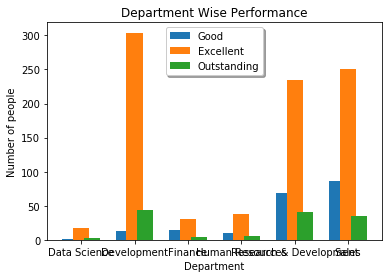

In [57]:
plt.xticks(x,dep['EmpDepartment'])
plt.bar(x-0.2, dep[2],width=0.3,label='Good')
plt.bar(x, dep[3],width=0.3,label='Excellent')
plt.bar(x+0.2, dep[4],width=0.3,label='Outstanding')
plt.legend(loc='best',shadow=True)
plt.xlabel('Department')
plt.ylabel('Number of people')
plt.title('Department Wise Performance')

### ------------------------------------------------------------------------------------
### TOP 3 IMPORTANT FACTOR EFFECT ON PERFORMANCE RATING
#### => Employee Environment Satisfaction
#### => Employee Last Salary Hike Percentage
#### => Employee Work Life Balance
### ------------------------------------------------------------------------------------

#### -----------------------------------------------------------------------------------------------------
### Employee Environment Satisfaction
#### -----------------------------------------------------------------------------------------------------

In [58]:
Top1 = pd.crosstab(data.EmpEnvironmentSatisfaction,dep_wise.PerformanceRating)

In [59]:
Top1

PerformanceRating,2,3,4
EmpEnvironmentSatisfaction,,,
1,90,127,13
2,98,130,14
3,3,310,54
4,3,307,51


In [60]:
Top1.reset_index(inplace=True)

In [61]:
Top1

PerformanceRating,EmpEnvironmentSatisfaction,2,3,4
0,1,90,127,13
1,2,98,130,14
2,3,3,310,54
3,4,3,307,51


In [62]:
x = np.arange(len(Top1['EmpEnvironmentSatisfaction']))
x

array([0, 1, 2, 3])

Text(0.5,1,'Employee Environment Satisfaction Wise Performance')

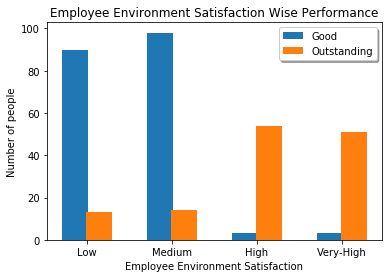

In [63]:
plt.xticks(x,['Low','Medium','High','Very-High'])
plt.bar(x-0.14, Top1[2],width=0.3,label='Good')
plt.bar(x+0.14, Top1[4],width=0.3,label='Outstanding')
plt.legend(loc='best',shadow=True)
plt.xlabel('Employee Environment Satisfaction')
plt.ylabel('Number of people')
plt.title('Employee Environment Satisfaction Wise Performance')

#### -----------------------------------------------------------------------------------------------------
### Employee Last Salary Hike Percent
#### -----------------------------------------------------------------------------------------------------

In [64]:
Top2 = pd.crosstab(data.EmpLastSalaryHikePercent,dep_wise.PerformanceRating)

In [65]:
Top2

PerformanceRating,2,3,4
EmpLastSalaryHikePercent,,,
11,28,140,1
12,30,123,2
13,27,138,3
14,28,140,4
15,11,67,4
16,12,54,2
17,9,55,3
18,10,63,0
19,10,51,2


In [66]:
Top2.reset_index(inplace=True)

In [67]:
Top2

PerformanceRating,EmpLastSalaryHikePercent,2,3,4
0,11,28,140,1
1,12,30,123,2
2,13,27,138,3
3,14,28,140,4
4,15,11,67,4
5,16,12,54,2
6,17,9,55,3
7,18,10,63,0
8,19,10,51,2
9,20,9,14,27


In [68]:
x = np.arange(len(Top2['EmpLastSalaryHikePercent']))
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

Text(0.5,1,'Last Salary Hike percent Wise Performance')

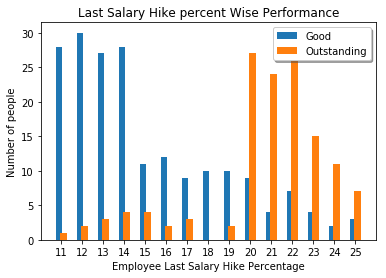

In [69]:
plt.xticks(x,Top2['EmpLastSalaryHikePercent'])
plt.bar(x-0.1, Top2[2],width=0.3,label='Good')
plt.bar(x+0.1, Top2[4],width=0.3,label='Outstanding')
plt.legend(loc='best',shadow=True)
plt.xlabel('Employee Last Salary Hike Percentage')
plt.ylabel('Number of people')
plt.title('Last Salary Hike percent Wise Performance')

#### -----------------------------------------------------------------------------------------------------
### Employee Work Life Balance
#### -----------------------------------------------------------------------------------------------------

In [70]:
Top3 = pd.crosstab(data.EmpWorkLifeBalance,dep_wise.PerformanceRating)

In [71]:
Top3

PerformanceRating,2,3,4
EmpWorkLifeBalance,,,
1,16,48,0
2,51,216,27
3,115,533,79
4,12,77,26


In [72]:
Top3.reset_index(inplace=True)

In [73]:
Top3

PerformanceRating,EmpWorkLifeBalance,2,3,4
0,1,16,48,0
1,2,51,216,27
2,3,115,533,79
3,4,12,77,26


In [74]:
x = np.arange(len(Top3['EmpWorkLifeBalance']))
x

array([0, 1, 2, 3])

Text(0.5,1,'Work Life Balance Wise Performance')

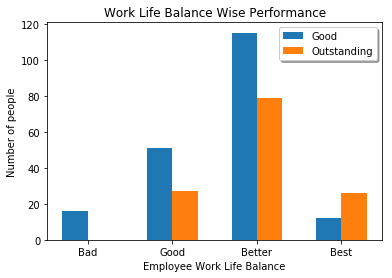

In [75]:
plt.xticks(x,['Bad','Good','Better','Best'])
plt.bar(x-0.15, Top3[2],width=0.3,label='Good')
plt.bar(x+0.15, Top3[4],width=0.3,label='Outstanding')
plt.legend(loc='best',shadow=True)
plt.xlabel('Employee Work Life Balance')
plt.ylabel('Number of people')
plt.title('Work Life Balance Wise Performance')

# TRAIN AND PREDICTICTING THE MODEL

### Retrieve DataSet

In [76]:
data = pd.read_csv('INX_Future_Inc.csv')
data.head()

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,...,EmpJobRole_Sales Executive,EmpJobRole_Sales Representative,EmpJobRole_Senior Developer,EmpJobRole_Senior Manager R&D,EmpJobRole_Technical Architect,EmpJobRole_Technical Lead,BusinessTravelFrequency_Travel_Frequently,BusinessTravelFrequency_Travel_Rarely,OverTime_Yes,Attrition_Yes
0,32,10,3,4,55,3,2,4,1,12,...,1,0,0,0,0,0,0,1,0,0
1,47,14,4,4,42,3,2,1,2,12,...,1,0,0,0,0,0,0,1,0,0
2,40,5,4,4,48,2,3,1,5,21,...,1,0,0,0,0,0,1,0,1,0
3,41,10,4,2,73,2,5,4,3,15,...,0,0,0,0,0,0,0,1,0,0
4,60,16,4,1,84,3,2,1,8,14,...,1,0,0,0,0,0,0,1,0,0


### Extract Features and Target from DataSet

In [77]:
X = data.drop(['PerformanceRating'],axis=1)
Y = data['PerformanceRating']

### Split the Data into Training and Testing

In [78]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.24,random_state=0)

### Train the Random Forest Classifier model

In [79]:
classifier = RandomForestClassifier(n_estimators=104, random_state=40)
classifier.fit(X_train,Y_train)
y_pred = classifier.predict(X_test)

#### Accuracy

In [80]:
accuracy_score(Y_test,y_pred)

0.9583333333333334

#### Confusion Matrix

In [81]:
confusion_matrix(Y_test,y_pred)

array([[ 37,   3,   0],
       [  2, 213,   2],
       [  0,   5,  26]], dtype=int64)

#### Classification Report

In [82]:
print(classification_report(Y_test,y_pred))

             precision    recall  f1-score   support

          2       0.95      0.93      0.94        40
          3       0.96      0.98      0.97       217
          4       0.93      0.84      0.88        31

avg / total       0.96      0.96      0.96       288

